In [53]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [12]:
df = pd.read_csv('../data/Entrenamiento_2020.csv')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [13]:
df.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [14]:
entrenamiento_sin_id = df.drop(['ID'], axis=1)
sin_duplicados = entrenamiento_sin_id.drop_duplicates(keep=False) 
sin_duplicados.count()

Region                                16328
Territory                             16328
Pricing, Delivery_Terms_Quote_Appr    16328
Pricing, Delivery_Terms_Approved      16328
Bureaucratic_Code_0_Approval          16328
Bureaucratic_Code_0_Approved          16328
Submitted_for_Approval                16328
Bureaucratic_Code                     16328
Account_Created_Date                  16328
Source                                16328
Billing_Country                       16328
Account_Name                          16328
Opportunity_Name                      16328
Opportunity_ID                        16328
Sales_Contract_No                     16328
Account_Owner                         16328
Opportunity_Owner                     16328
Account_Type                          16328
Opportunity_Type                      16328
Quote_Type                            16328
Delivery_Terms                        16328
Opportunity_Created_Date              16328
Brand                           

In [16]:
sin_duplicados.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [47]:
#Investigamos que contenido hay en cada una de las columnas burocraticas
sin_duplicados['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12077
Bureaucratic_Code_5     3750
Bureaucratic_Code_2      226
Bureaucratic_Code_1      223
Bureaucratic_Code_0       49
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [48]:
sin_duplicados['Submitted_for_Approval'].value_counts()

0    16328
Name: Submitted_for_Approval, dtype: int64

In [50]:
#La columna 'Submitted_for_Approval' tiene contenido "basura" ya que no nos aporta nada. Son datos "corrompidos".

In [24]:
sin_duplicados['Bureaucratic_Code_0_Approval'].value_counts()

0    8614
1    7714
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [26]:
sin_duplicados['Pricing, Delivery_Terms_Approved'].value_counts()

1    9567
0    6761
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [74]:
sin_duplicados['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13317
0     3011
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [61]:
approved = sin_duplicados.loc[(sin_duplicados['Bureaucratic_Code_0_Approval']==1)\
                              & (sin_duplicados['Pricing, Delivery_Terms_Approved']==1)\
                              & (sin_duplicados['Pricing, Delivery_Terms_Quote_Appr']==1),:]
approved['Stage'].value_counts()

Closed Won     2812
Closed Lost    2463
Proposal         26
Negotiation      17
Name: Stage, dtype: int64

In [57]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

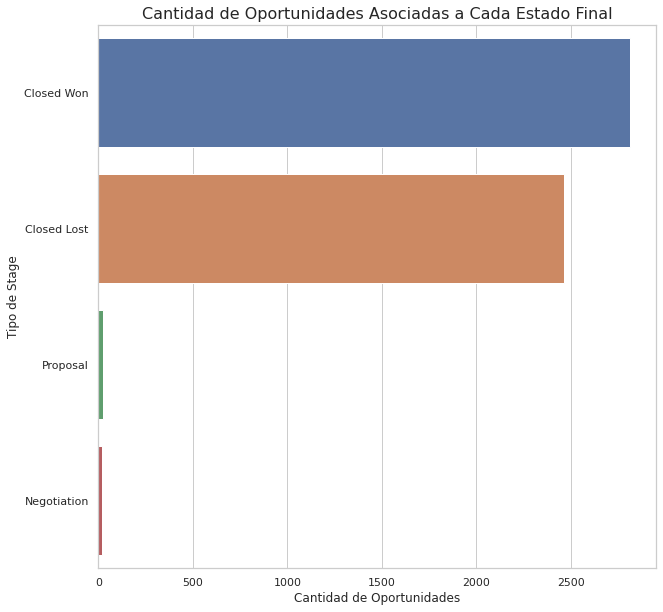

In [55]:
target = approved['Stage'].value_counts()
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index)
grafico_top_key.set_title("Cantidad de Oportunidades Asociadas a Cada Estado Final",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=12)
grafico_top_key.set_ylabel("Tipo de Stage",fontsize=12);

De las 9533 oportunidades que fueron exitosas, unicamente 2812 tienen aprovado el codigo burocrático 0 y acordados los terminos de precio y envio.

In [67]:
approved_bureaucratic_0_and_won = sin_duplicados.loc[(sin_duplicados['Bureaucratic_Code_0_Approval']==1) & (sin_duplicados['Stage']=='Closed Won'),:]
approved_bureaucratic_0_and_won['Stage'].count()

3466

Solamente tomando la petición de aprobación del codigo 0 burocratico, se suman unos 654 oportunidades nuevas que fueron concretadas.

In [64]:
approved_bureaucratic_0_and_won['Bureaucratic_Code_0_Approved'].value_counts()

1    2730
0     736
Name: Bureaucratic_Code_0_Approved, dtype: int64

De las 3466 oportunidades que pidieron la aprobación, solamente 2730 pero finalmente todas terminaron en una operación exitosa.

In [60]:
approved_terms_and_won = sin_duplicados.loc[(sin_duplicados['Pricing, Delivery_Terms_Approved']==1) & (sin_duplicados['Stage']=='Closed Won'),:]
approved_terms_and_won['Region'].count()

6275

Solamente tomando la aprobación de terminos de envio y precio, se suman unos 3463 oportunidades nuevas que fueron concretadas.

In [66]:
approved_terms_and_won['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    6275
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

De las 6275 oportunidades que fueron aprobadas, y terminaron en exito, todas fueron previamente acordadas. Veamos que sucede en la situación inversa.

In [70]:
approved_quote_terms_and_won = sin_duplicados.loc[(sin_duplicados['Pricing, Delivery_Terms_Quote_Appr']==1) & (sin_duplicados['Stage']=='Closed Won'),:]
approved_quote_terms_and_won['Stage'].count()

7249

In [73]:
approved_quote_terms_and_won['Pricing, Delivery_Terms_Approved'].value_counts()

1    6275
0     974
Name: Pricing, Delivery_Terms_Approved, dtype: int64

Se acordaron 7249 terminos, de los cuales terminaron en exito, como se muestra previamente, 6275. De todas formas, de las 974 oportunidades que no se "acordaron" los terminos, finalizaron en un acuerdo exitoso.